In [175]:
# Librerie
import os
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
plt.style.use('ggplot')
get_ipython().magic('pylab inline')

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Cartelle Input/Output
dir_df = os.path.join(os.path.abspath(''),'stg')
dir_out = os.path.join(os.path.abspath(''),'output')

In [3]:
df_g1_filename = r'df_g1.pkl'
df_g1_fullpath = os.path.join(dir_df, df_g1_filename)
df_g1 = pd.read_pickle(df_g1_fullpath)

In [7]:
df_g1 = df_g1[df_g1['Territorio']!='Italia']

In [8]:
df_g1.head(2)

,Territorio,Popolazione residente,Speranza di vita alla nascita,Reddito pro capite
1,Nord,27799803,82.8,32964.21
2,Sud,14149806,81.7,17867.38


In [9]:
df_g1['Popolazione residente'] = df_g1['Popolazione residente']/100000

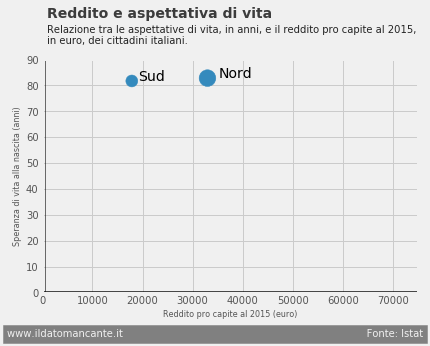

In [221]:
style.use('fivethirtyeight')
# Report G1
tp = df_g1.plot(
        x='Reddito pro capite', 
        y='Speranza di vita alla nascita', 
        s=df_g1['Popolazione residente'],
        kind='scatter',
        xlim=(0,75000), 
        ylim=(0,90),
        legend = False,
        figsize = (6,4))

for i, txt in enumerate(df_g1.Territorio):
    tp.annotate(txt, (df_g1['Reddito pro capite'].iat[i]*1.070,df_g1['Speranza di vita alla nascita'].iat[i]))
    tp.plot()
    
tp.tick_params(axis = 'both', which = 'major', labelsize = 10)

# Generate a bolded horizontal line at y = 0 
tp.axhline(y = 0, color = 'black', linewidth = 4, alpha = 0.7)
tp.axvline(x = 500, color = 'black', linewidth = 0.8, alpha = 0.7)

# Remove the label of the x-axis
#tp.xaxis.label.set_visible(False)
#tp.yaxis.label.set_visible(False)
tp.set_ylabel('Speranza di vita alla nascita (anni)',fontsize=8)
tp.set_xlabel('Reddito pro capite al 2015 (euro)',fontsize=8)

text = tp.text(x = -7000, y = -17,
    s = 'www.ildatomancante.it                                                                              Fonte: Istat',
    fontsize = 10, color = '#f0f0f0', backgroundcolor = 'grey')

text.set_url('http://www.ildatomancante.it/opendata/popolazione/799/la-grande-fuga-salute-ricchezza-e-origini-della-disuguaglianza-in-italia/')

# Adding a title and a subtitle Reddito e aspettativa di vita
tp.text(x = 1000, y = 106, s = "Reddito e aspettativa di vita",
               fontsize = 14, weight = 'bold', alpha = .75)
tp.text(x = 1000, y = 96, 
               s = '''Relazione tra le aspettative di vita, in anni, e il reddito pro capite al 2015, \nin euro, dei cittadini italiani.''',
              fontsize = 10, alpha = .85)

fig_prj = tp.get_figure()
fig_prj.savefig(os.path.join(dir_out,'g1.png'), format='png', dpi=300,bbox_inches='tight')
fig_prj.savefig(os.path.join(dir_out,'g1.svg'), format='svg', dpi=300,bbox_inches='tight')

In [13]:
df_g1.to_csv(os.path.join(dir_out,r'G1_Preston.csv'),header=True, index=False)